In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read in data
df = pd.read_csv('../data/train.csv', parse_dates=['Date'])
df.loc[df['Province/State'].isnull(), 'Province/State'] = \
    df.loc[df['Province/State'].isnull(), 'Country/Region']

# get the current statusa
max_figures = df.groupby('Province/State')[['ConfirmedCases','Fatalities']].max()

## Distribution of outbreak sizes, + fatality rates

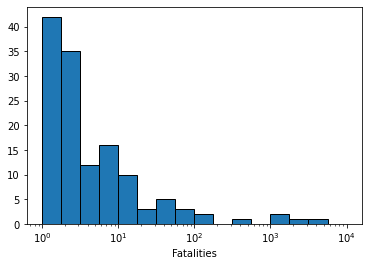

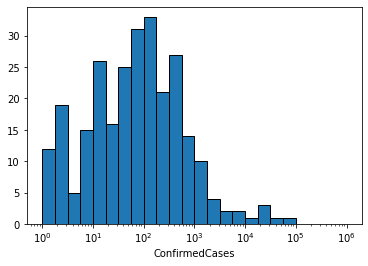

In [5]:
plt.hist(max_figures['Fatalities'], bins=np.logspace(0,4,4*4 + 1), edgecolor='k')
plt.xlabel('Fatalities')
plt.xscale('log')
plt.show()

plt.hist(max_figures['ConfirmedCases'], bins=np.logspace(0,6,4*6 + 1), edgecolor='k')
plt.xlabel('ConfirmedCases')
plt.xscale('log')
plt.show()

In [6]:
# Variance in fatality rate
max_figures['fatality_rate'] = max_figures['Fatalities']/max_figures['ConfirmedCases']

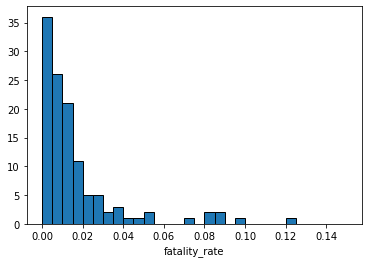

In [7]:
min_fatalities = 5
min_cases = 100
mask = (max_figures['Fatalities'] >= min_fatalities)|(max_figures['ConfirmedCases'] >= min_cases)
plt.hist(max_figures[mask]['fatality_rate'], bins=np.linspace(0, 0.15, 2*15 + 1), edgecolor='k')
plt.xlabel('fatality_rate')
plt.show()

In [8]:
max_figures[mask].sort_values('fatality_rate')

,ConfirmedCases,Fatalities,fatality_rate
Province/State,,,
Chile,434.0,0.0,0.000000
Finland,450.0,0.0,0.000000
Estonia,283.0,0.0,0.000000
Israel,705.0,0.0,0.000000
Qatar,470.0,0.0,0.000000
...,...,...,...
Philippines,230.0,19.0,0.082609
Italy,47021.0,4032.0,0.085749
Indonesia,369.0,32.0,0.086721


# Time series

In [88]:
fatality_countries = max_figures.sort_values('Fatalities', ascending=False)[:10].index
cases_countries = max_figures.sort_values('ConfirmedCases', ascending=False)[:10].index

### Cumulative counts

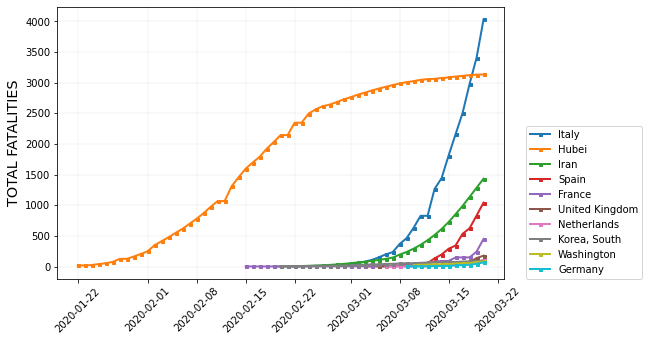

In [155]:
var = 'Fatalities'
plt.figure(figsize=[8, 5])
for country in fatality_countries:
    x = df[(df['Province/State'] == country)&(df[var] > 0)]
    plt.plot(x['Date'], x[var], '-s', markersize=3, linewidth=2)
# plt.yscale('log')
plt.legend(fatality_countries, loc=(1.05,0))
plt.ylabel('TOTAL ' + var.upper(), fontsize='x-large')
plt.xticks(rotation=45)
plt.grid(linewidth=0.15, zorder=-1)
plt.savefig('plots/cumulative_{}.png'.format(var), bbox_inches='tight', dpi=300)
plt.show()

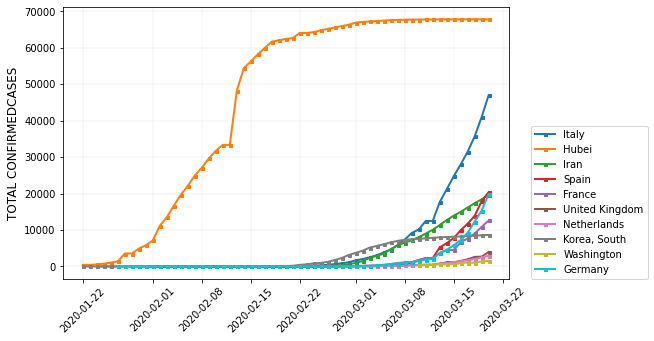

In [129]:
var = 'ConfirmedCases'
plt.figure(figsize=[8, 5])
for country in fatality_countries:
    x = df[(df['Province/State'] == country)&(df[var] > 0)]
    plt.plot(x['Date'], x[var], '-s', markersize=3, linewidth=2)
# plt.yscale('log')
plt.legend(fatality_countries, loc=(1.05,0))
plt.ylabel('TOTAL ' + var.upper(), fontsize='large')
plt.xticks(rotation=45)
plt.grid(linewidth=0.15, zorder=-1)
plt.savefig('plots/cumulative_{}.png'.format(var), bbox_inches='tight', dpi=300)
plt.show()

### Growth Rate

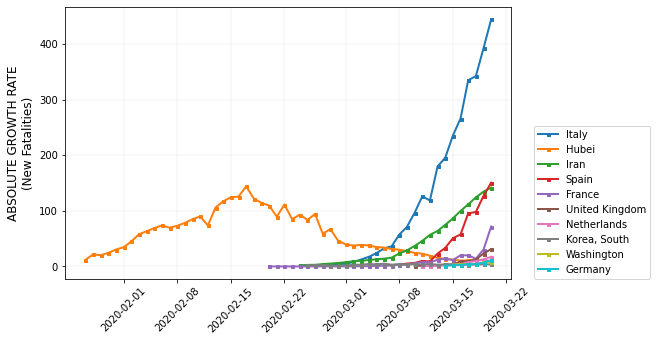

In [150]:
var = 'Fatalities'
plt.figure(figsize=[8, 5])
for country in fatality_countries:
    x = df[(df['Province/State'] == country)&(df[var] > 0)]
    plt.plot(x['Date'], x[var].diff().rolling(5).mean(), '-s', markersize=3, linewidth=2)
# plt.yscale('log')
plt.legend(fatality_countries, loc=(1.05,0))
plt.ylabel('ABSOLUTE GROWTH RATE\n(New ' + var + ')', fontsize='large')
plt.xticks(rotation=45)
plt.grid(linewidth=0.15, zorder=-1)
plt.savefig('plots/growth_rate_{}.png'.format(var), bbox_inches='tight', dpi=300)
plt.show()

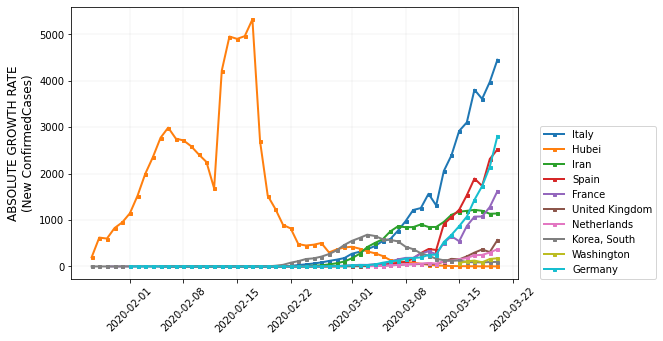

In [151]:
var = 'ConfirmedCases'
plt.figure(figsize=[8, 5])
for country in fatality_countries:
    x = df[(df['Province/State'] == country)&(df[var] > 0)]
    plt.plot(x['Date'], x[var].diff().rolling(5).mean(), '-s', markersize=3, linewidth=2)
# plt.yscale('log')
plt.legend(fatality_countries, loc=(1.05,0))
plt.ylabel('ABSOLUTE GROWTH RATE\n(New ' + var + ')', fontsize='large')
plt.xticks(rotation=45)
plt.grid(linewidth=0.15, zorder=-1)
plt.savefig('plots/growth_rate_{}.png'.format(var), bbox_inches='tight', dpi=300)
plt.show()

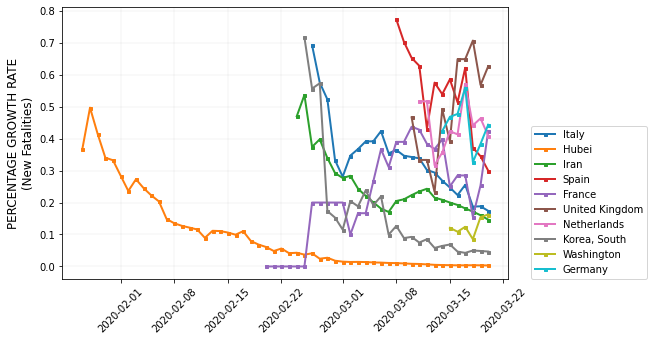

In [147]:
var = 'Fatalities'
plt.figure(figsize=[8, 5])
for country in fatality_countries:
    x = df[(df['Province/State'] == country)&(df[var] > 0)]
    plt.plot(x['Date'], (x[var].diff() / x[var].shift()).rolling(5).mean(), '-s', markersize=3, linewidth=2)
# plt.yscale('log')
plt.legend(fatality_countries, loc=(1.05,0))
plt.ylabel('PERCENTAGE GROWTH RATE\n(New ' + var + ')', fontsize='large')
plt.xticks(rotation=45)
plt.grid(linewidth=0.15, zorder=-1)
# plt.savefig('plots/growth_{}.png'.format(var), bbox_inches='tight', dpi=300)
plt.show()

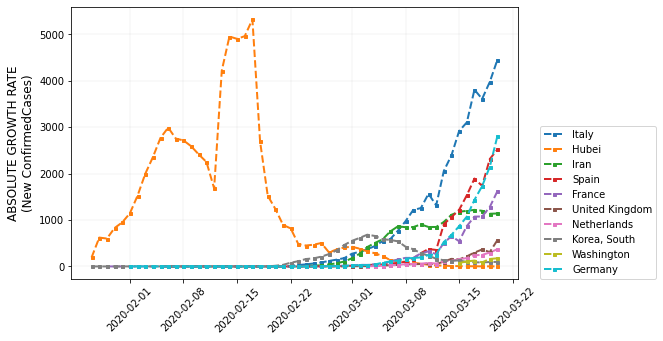

In [139]:
var = 'ConfirmedCases'
plt.figure(figsize=[8, 5])
for country in fatality_countries:
    x = df[(df['Province/State'] == country)&(df[var] > 0)]
    plt.plot(x['Date'], x[var].diff().rolling(5).mean(), '--s', markersize=3, linewidth=2)
# plt.yscale('log')
plt.legend(fatality_countries, loc=(1.05,0))
plt.ylabel('ABSOLUTE GROWTH RATE\n(New ' + var + ')', fontsize='large')
plt.xticks(rotation=45)
plt.grid(linewidth=0.15, zorder=-1)
plt.show()

In [56]:
df[df['Province/State'] == 'Australian Capital Territory']

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
472,745,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0.0,0.0
473,746,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-23,0.0,0.0
474,747,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-24,0.0,0.0
475,748,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-25,0.0,0.0
476,749,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-26,0.0,0.0
477,750,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-27,0.0,0.0
478,751,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-28,0.0,0.0
479,752,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-29,0.0,0.0
480,753,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-30,0.0,0.0
481,754,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-31,0.0,0.0


In [72]:
a = x[var].diff().rolling(1)